In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)

In [2]:
# Import the data
client_df = pd.read_csv('../Data/client_data.csv')
price_df = pd.read_csv('../Data/price_data.csv')

In [3]:
# Check the first 5 info on the client data
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
# Check the first 5 info on the price data
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset.

### 1. Dtype

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
client_df.shape

(14606, 26)

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
price_df.shape

(193002, 8)

### 2. Basic Check

In [9]:
# We need to convert the dtype of date_active, date_end, date_modif_prod, date_renewal into datetime
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

for column in date_columns:
    client_df[column] = pd.to_datetime(client_df[column])

client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [10]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [11]:
# Checking the Missing Values of Client Dataset
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [12]:
# Checking the Missing Values of Price Dataset
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

### 3. Statistics

In [13]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [14]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


### Data Visualization

In [15]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

#### churn Percentage

In [16]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
churn_percentage

,Companies
churn,
0,90.284814
1,9.715186


In [17]:
client_df.churn.value_counts()

0    13187
1     1419
Name: churn, dtype: int64

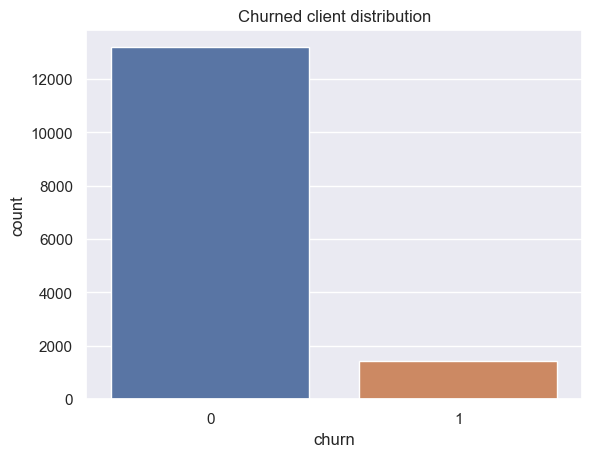

In [18]:
plt.figsize=(15, 8)
sns.countplot(x='churn', data=client_df)
plt.title('Churned client distribution');

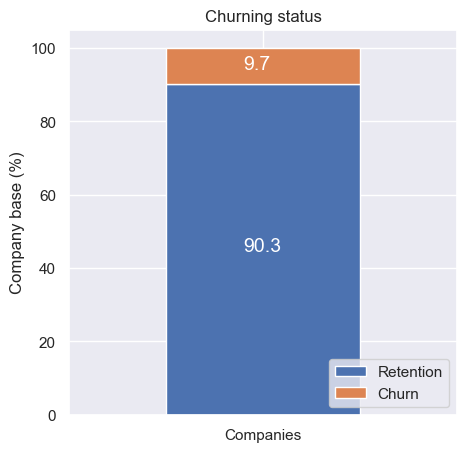

In [19]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right");

#### Consumption

In [20]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


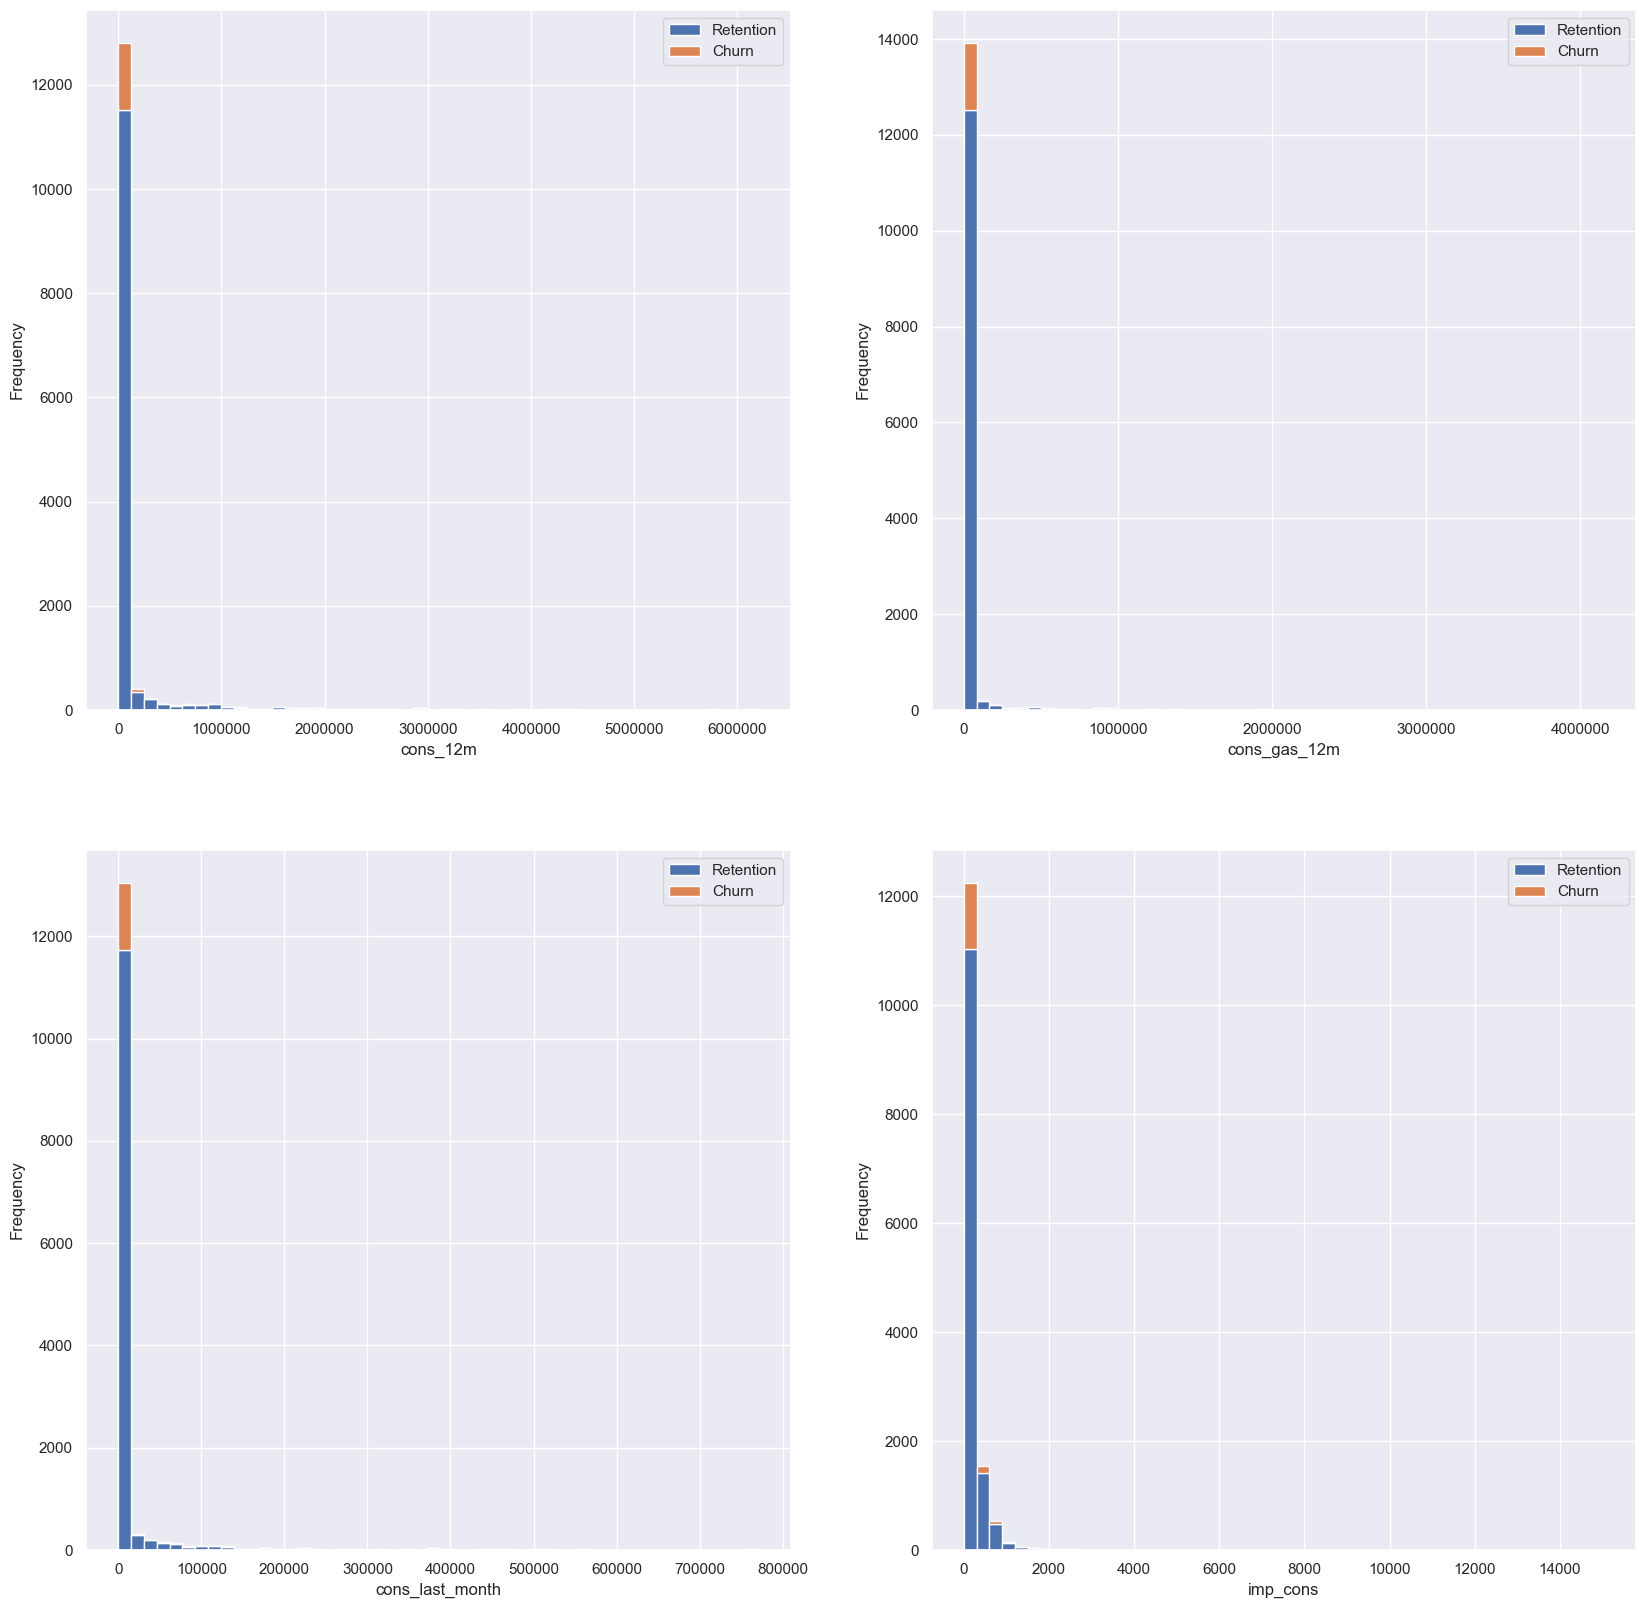

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plot_distribution(consumption, column='cons_12m', ax=ax[0,0])
plot_distribution(consumption, column='cons_gas_12m', ax=ax[0,1])
plot_distribution(consumption, column='cons_last_month', ax=ax[1,0])
plot_distribution(consumption, column='imp_cons', ax=ax[1,1])

plt.savefig("Distribution of the consumption.png", bbox_inches='tight')

The consumption data exhibits a noticeable positive skew, with a pronounced elongation in the right tail, especially towards the higher end of the data range. Outliers are most likely to be present at both the upper and lower extremes of the distribution. To better visualize these outliers, we can employ a common graphical tool: the boxplot. A boxplot provides a visual representation of the data distribution using a five-number summary:
- Minimum
- First Quartile (Q1)
- Median
- Third Quartile (Q3)
- Maximum

This representation can help identify unusual data points and their respective values. Furthermore, it can offer insights into how our data is distributed, whether it displays symmetry or skewness, and the extent of clustering.

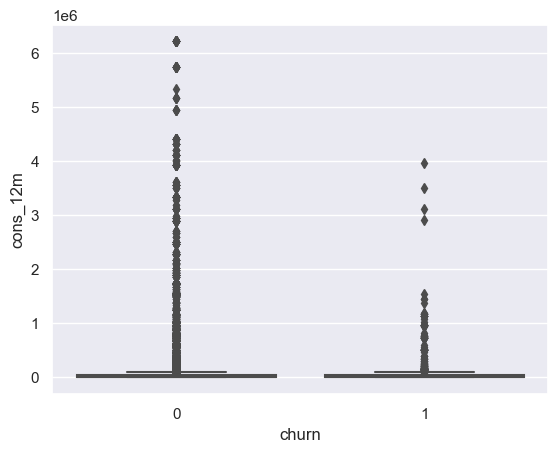

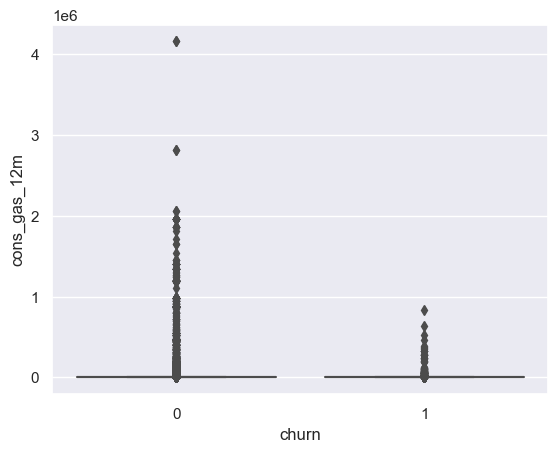

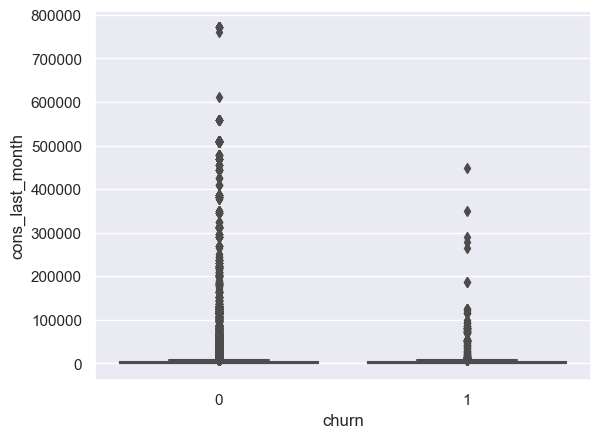

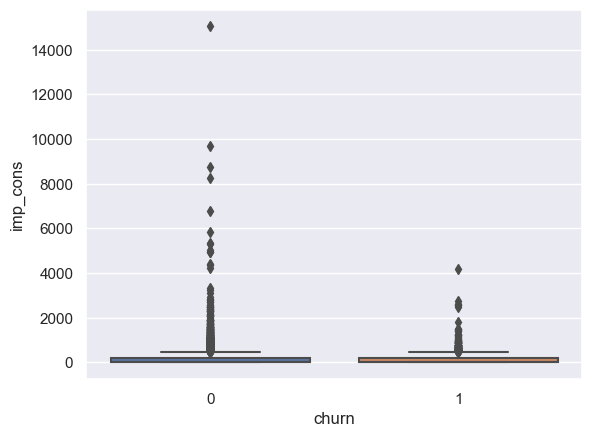

In [22]:
# Loop through each column in the range from index 1 to 4 (columns 2 to 5) in the 'consumption' dataframe
for i, col in enumerate(consumption.columns[1:5]):
    # Create a new figure with index 'i' for each iteration
    plt.figure(i)
    # Create a boxplot using seaborn library, where 'x' represents the 'churn' column and 'y' represents the current column in the iteration
    sns.boxplot(x='churn', y=col, data=consumption)


#### Forecast

In [23]:
forecast = client_df[['id', "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]
forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


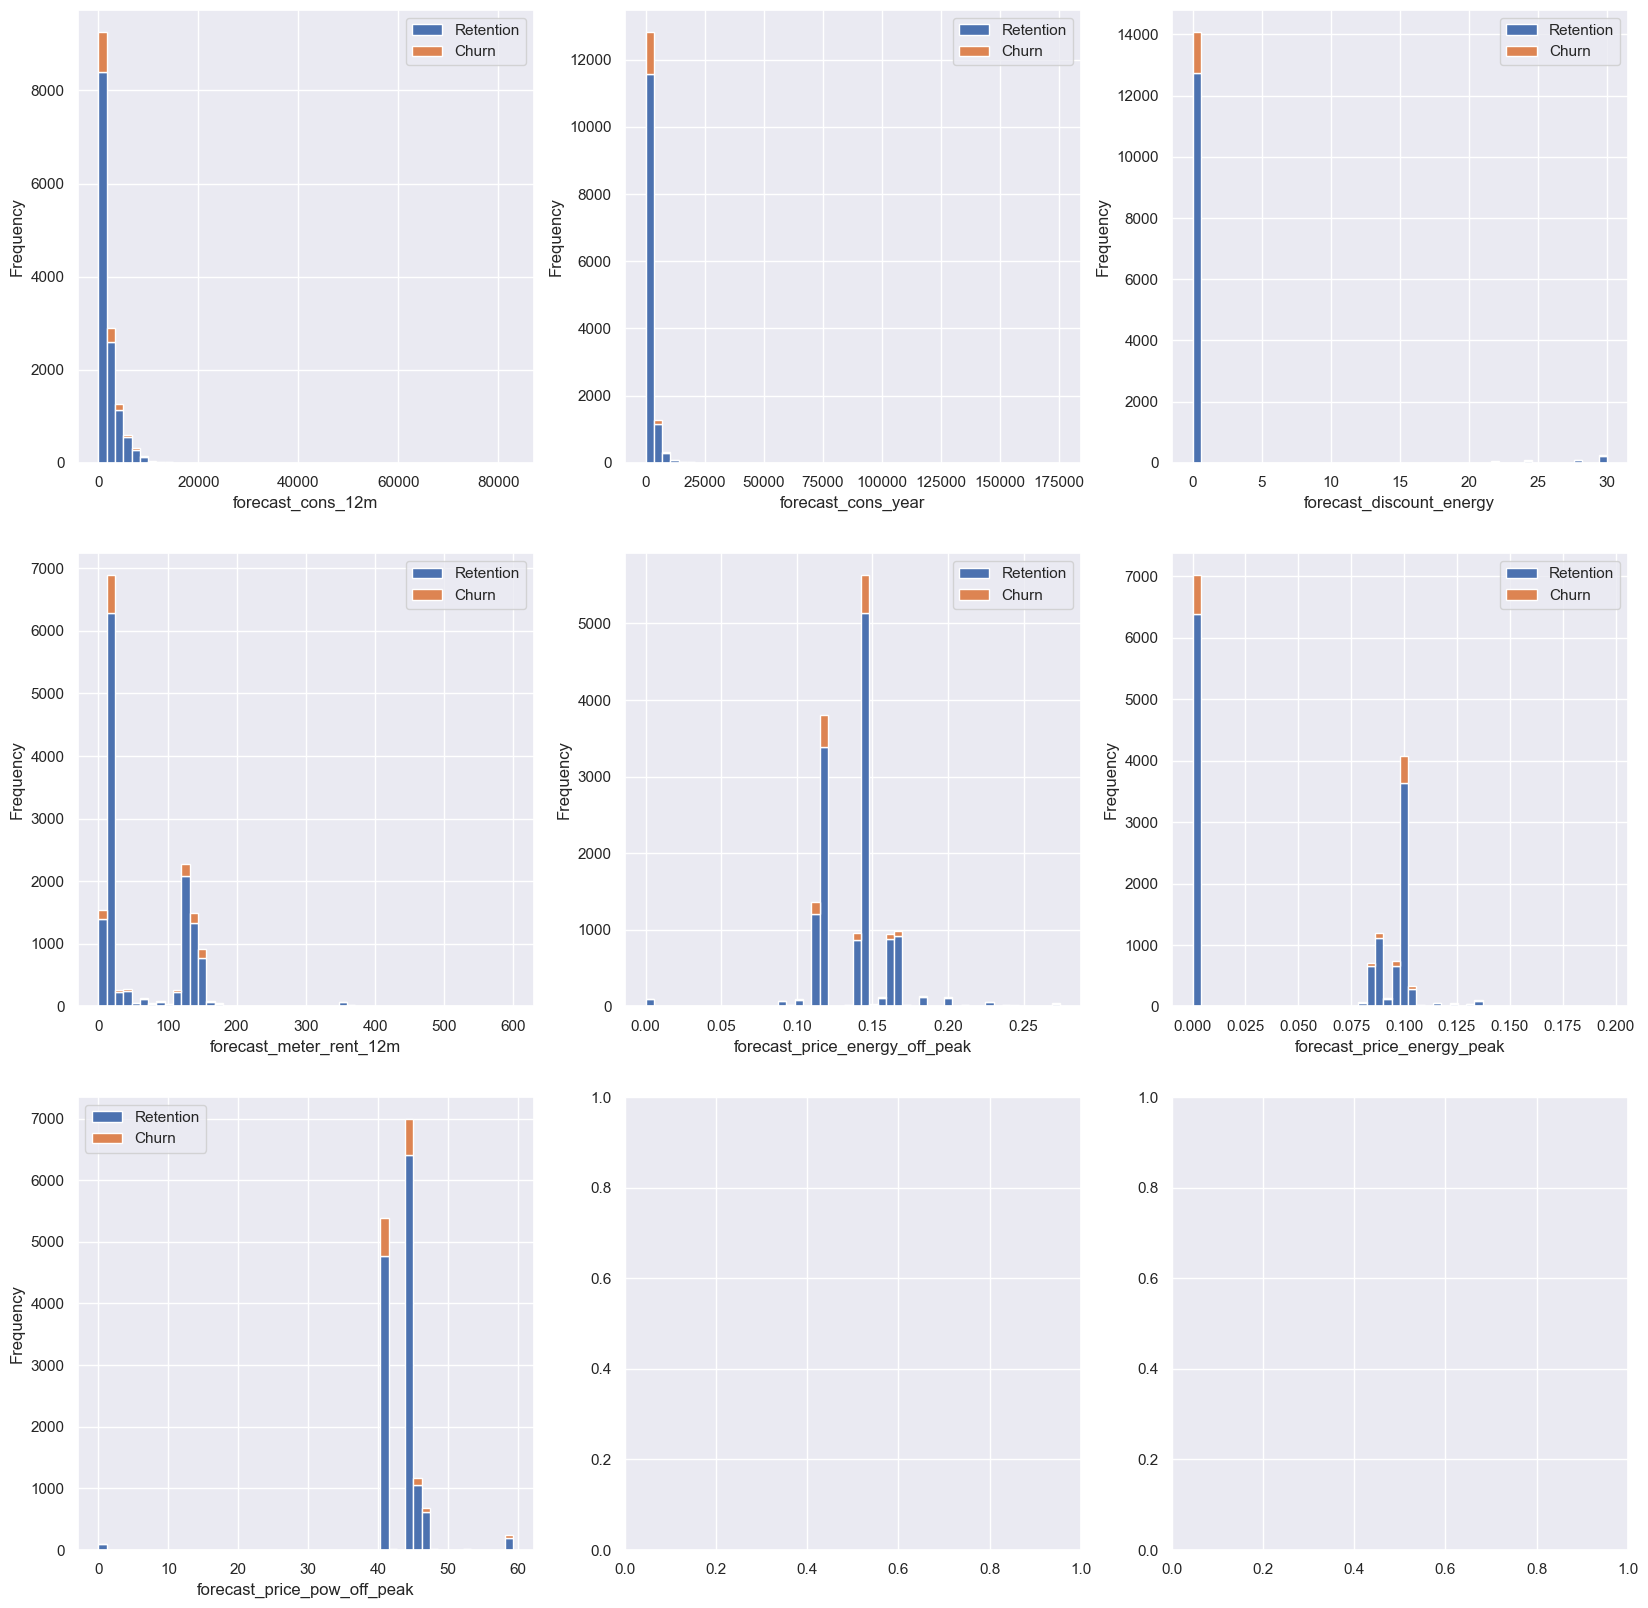

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

# Plot the distribution of the forecasted values for each feature
plot_distribution(forecast, column='forecast_cons_12m', ax=ax[0,0])
plot_distribution(forecast, column='forecast_cons_year', ax=ax[0,1])
plot_distribution(forecast, column='forecast_discount_energy', ax=ax[0,2])
plot_distribution(forecast, column='forecast_meter_rent_12m', ax=ax[1,0])
plot_distribution(forecast, column='forecast_price_energy_off_peak', ax=ax[1,1])
plot_distribution(forecast, column='forecast_price_energy_peak', ax=ax[1,2])
plot_distribution(forecast, column='forecast_price_pow_off_peak', ax=ax[2,0]) 

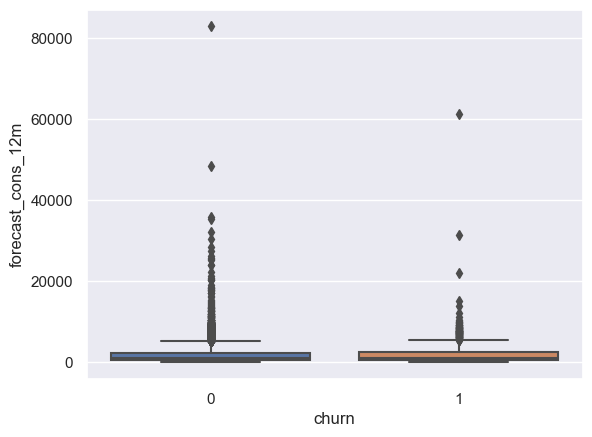

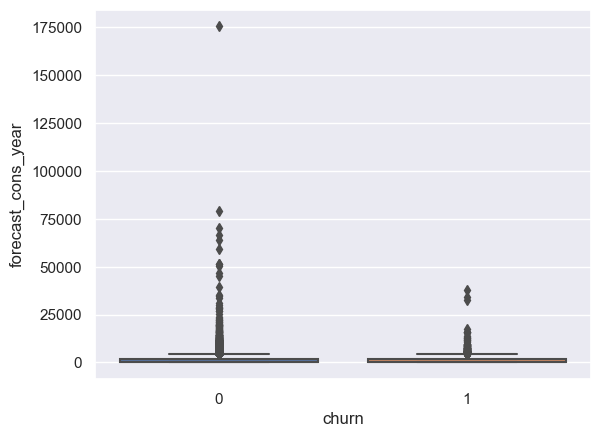

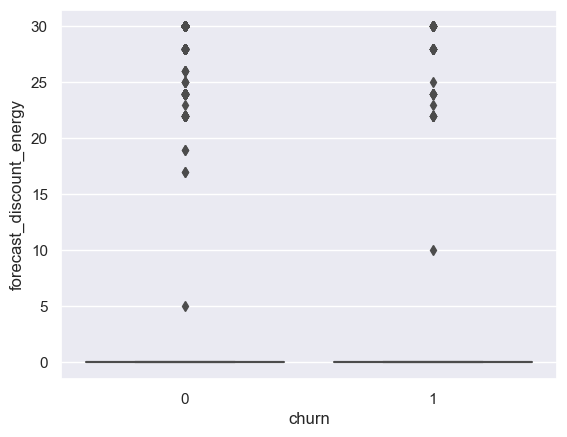

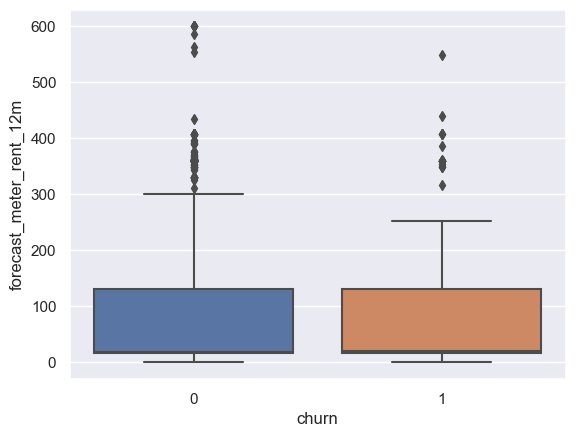

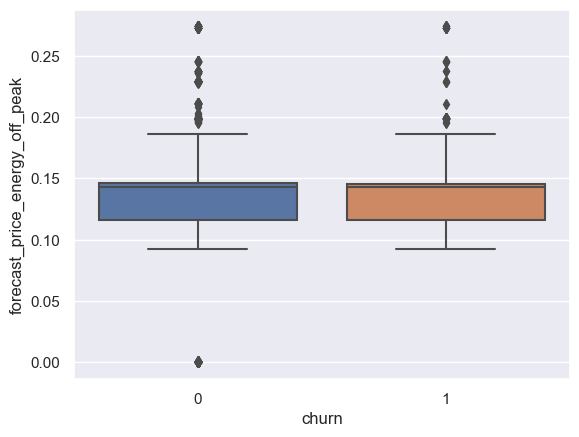

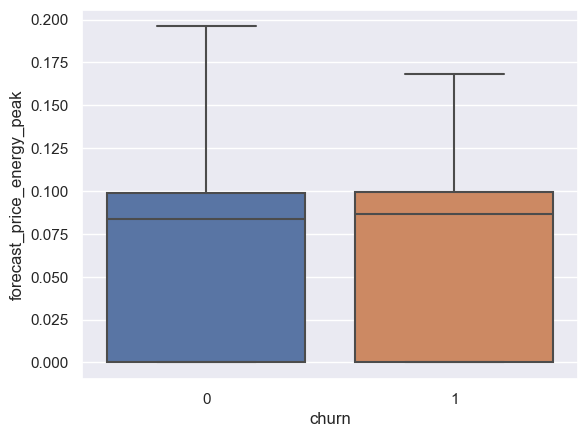

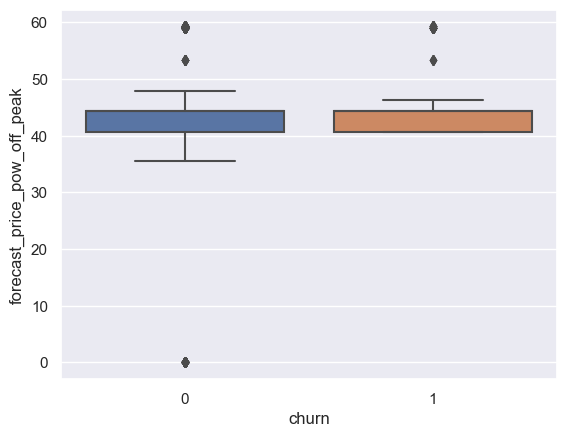

In [25]:
# checking for outliers
for i, col in enumerate(forecast.columns[1:8]):
    plt.figure(i)
    sns.boxplot(x='churn', y=col, data=forecast)

#### Contract type

In [26]:
client_df['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

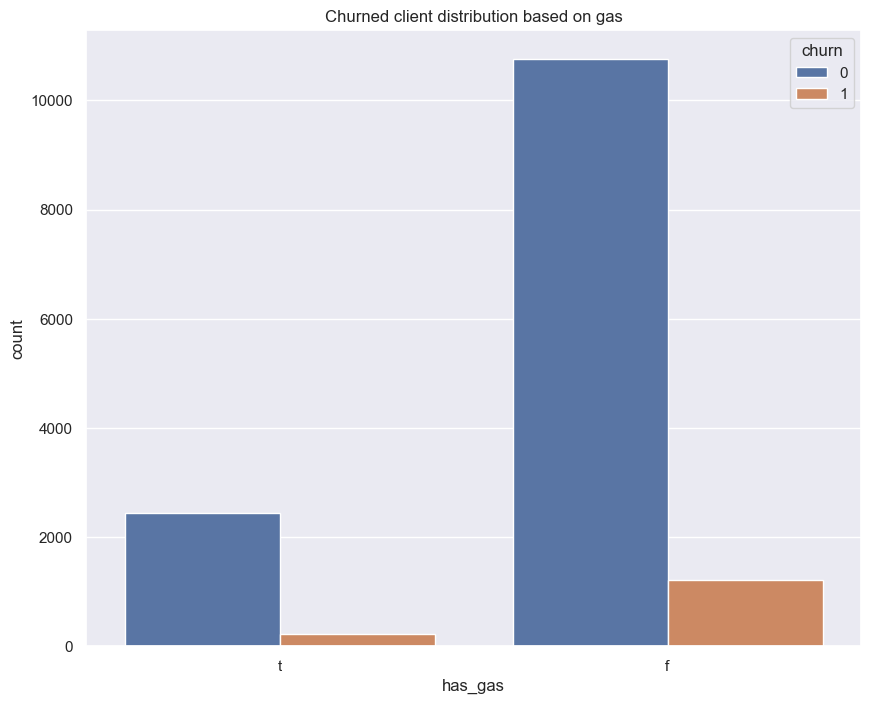

In [27]:
# Distribution of the churned and those who have gas
plt.figure(figsize=(10, 8))
sns.countplot(x='has_gas', hue='churn', data=client_df)
plt.title('Churned client distribution based on gas');

#### Margins

In [28]:
margins = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]
margins.head()

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin,churn
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,1
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89,0
2,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60,0
3,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46,0
4,149d57cf92fc41cf94415803a877cb4b,44.91,44.91,47.98,0


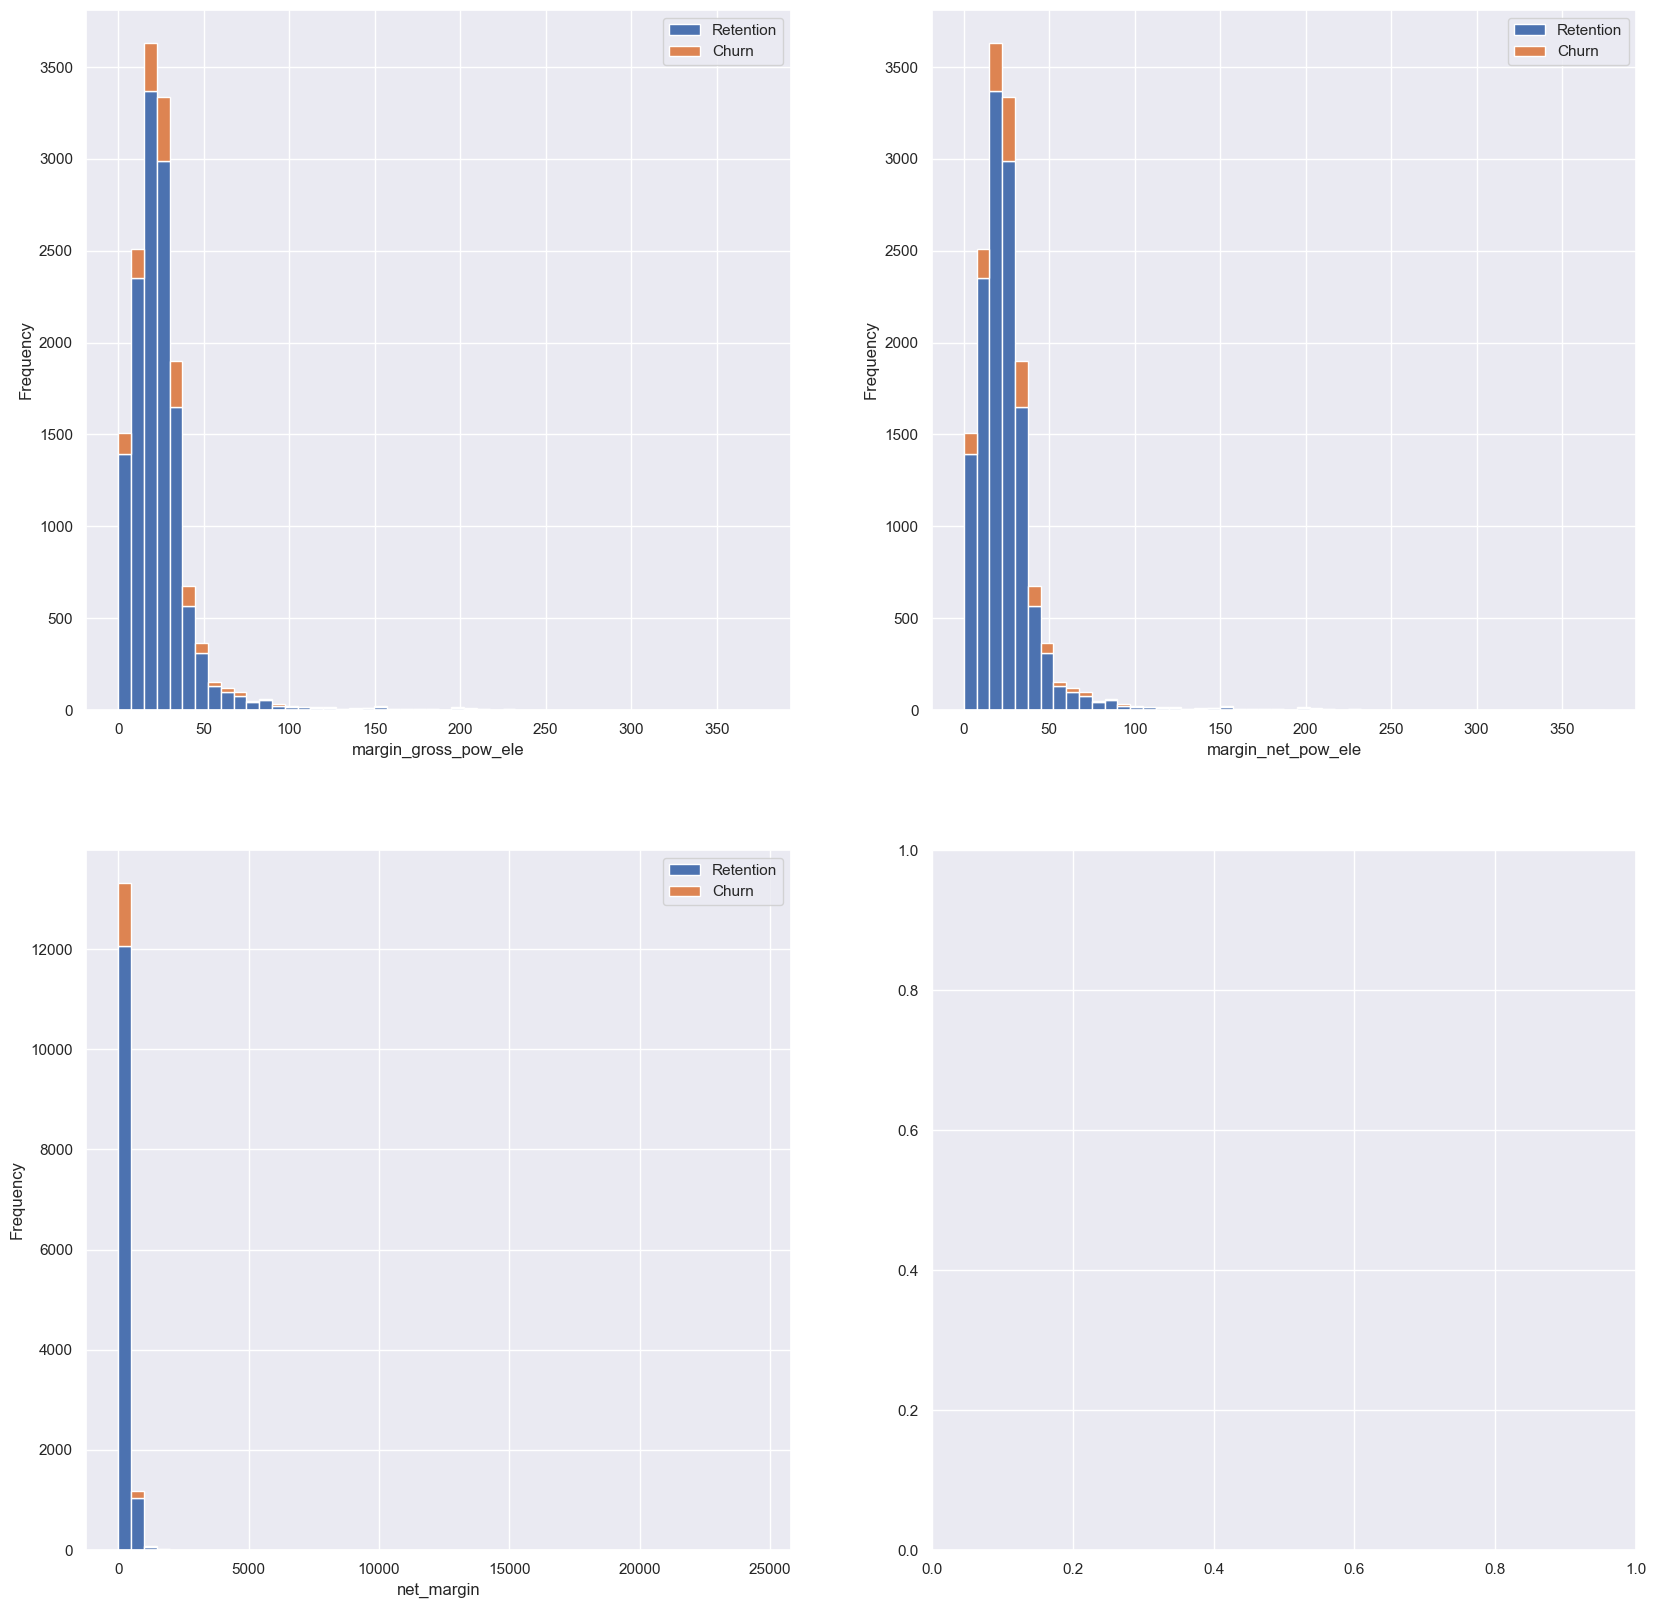

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plot_distribution(margins, column='margin_gross_pow_ele', ax=ax[0,0])
plot_distribution(margins, column='margin_net_pow_ele', ax=ax[0,1])
plot_distribution(margins, column='net_margin', ax=ax[1,0])

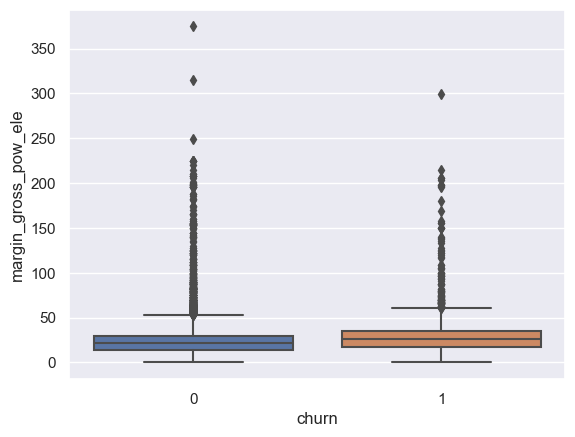

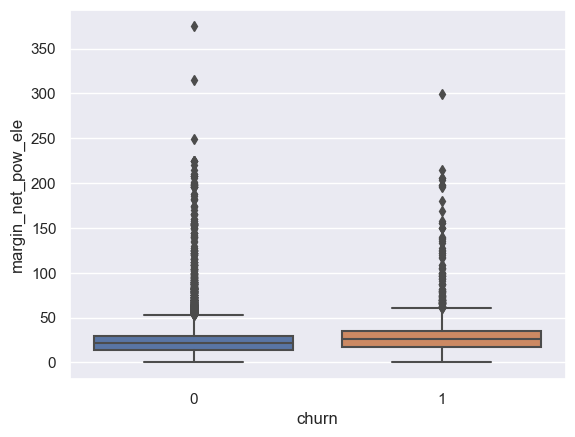

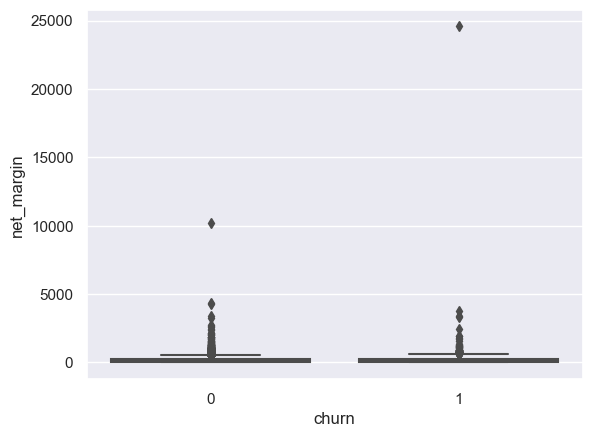

In [30]:
for i, col in enumerate(margins.columns[1:4]):
    plt.figure(i)
    sns.boxplot(x='churn', y=col, data=margins)

## Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it.

In [31]:
mean_year = price_df.groupby(["id"]).mean(numeric_only=True).reset_index()
mean_6_month = price_df[price_df["price_date"] > "2015-06-01"].groupby(["id"]).mean(numeric_only=True).reset_index()
mean_3_month = price_df[price_df["price_date"] > "2015-10-01"].groupby(["id"]).mean(numeric_only=True).reset_index()

In [32]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [33]:
# rename all the columns in the mean_year, mean_6_month, mean_3_month dataframe

# mean_year
mean_year = mean_year.rename(index=str,
                             columns={
                                "price_off_peak_var": "mean_year_price_off_peak_var",
                                "price_peak_var": "mean_year_price_peak_var",
                                "price_mid_peak_var": "mean_year_price_mid_peak_var",
                                "price_off_peak_fix": "mean_year_price_off_peak_fix",
                                "price_peak_fix": "mean_year_price_peak_fix",
                                "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
                             }
)

# mean_6_month
mean_6_month = mean_6_month.rename(index=str,
                                   columns= {
                                       "price_off_peak_var": "mean_6_month_price_off_peak_var",
                                       "price_peak_var": "mean_6_month_price_peak_var",
                                       "price_mid_peak_var": "mean_6_month_price_mid_peak_var",
                                       "price_off_peak_fix": "mean_6_month_price_off_peak_fix",
                                       "price_peak_fix": "mean_6_month_price_peak_fix",
                                       "price_mid_peak_fix": "mean_6_month_price_mid_peak_fix"
                                   })

# mean_3_month
mean_3_month = mean_3_month.rename(index=str,
                                   columns= {
                                       "price_off_peak_var": "mean_3_month_price_off_peak_var",
                                       "price_peak_var": "mean_3_month_price_peak_var",
                                       "price_mid_peak_var": "mean_3_month_price_mid_peak_var",
                                       "price_off_peak_fix": "mean_3_month_price_off_peak_fix",
                                       "price_peak_fix": "mean_3_month_price_peak_fix",
                                       "price_mid_peak_fix": "mean_3_month_price_mid_peak_fix"
                                   })

In [34]:
mean_year.head(2)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000


In [35]:
mean_6_month.head(2)

,id,mean_6_month_price_off_peak_var,mean_6_month_price_peak_var,mean_6_month_price_mid_peak_var,mean_6_month_price_off_peak_fix,mean_6_month_price_peak_fix,mean_6_month_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000


In [36]:
mean_3_month.head(2)

,id,mean_3_month_price_off_peak_var,mean_3_month_price_peak_var,mean_3_month_price_mid_peak_var,mean_3_month_price_off_peak_fix,mean_3_month_price_peak_fix,mean_3_month_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000


In [37]:
# Add the means

# Mean_Year
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_mid_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

# mean_6_month
mean_6_month["mean_6_month_price_off_peak"] = mean_6_month["mean_6_month_price_off_peak_var"] + mean_6_month["mean_6_month_price_off_peak_fix"]
mean_6_month["mean_6_month_price_peak"] = mean_6_month["mean_6_month_price_peak_var"] + mean_6_month["mean_6_month_price_peak_fix"]
mean_6_month["mean_6_month_price_mid_peak"] = mean_6_month["mean_6_month_price_mid_peak_var"] + mean_6_month["mean_6_month_price_mid_peak_fix"]

# mean_3_month
mean_3_month["mean_3_month_price_off_peak"] = mean_3_month["mean_3_month_price_off_peak_var"] + mean_3_month["mean_3_month_price_off_peak_fix"]
mean_3_month["mean_3_month_price_peak"] = mean_3_month["mean_3_month_price_peak_var"] + mean_3_month["mean_3_month_price_peak_fix"]
mean_3_month["mean_3_month_price_mid_peak"] = mean_3_month["mean_3_month_price_mid_peak_var"] + mean_3_month["mean_3_month_price_mid_peak_fix"]

In [38]:
# Merge into 1 dataframe

# Merge mean_year and mean_6_month
mean_year_6_month = pd.merge(mean_year, mean_6_month, on="id", how="left")

# Merge mean_year_6_month and mean_3_month
price_features = pd.merge(mean_year_6_month, mean_3_month, on="id", how="left")
price_features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_6_month_price_mid_peak,mean_3_month_price_off_peak_var,mean_3_month_price_peak_var,mean_3_month_price_mid_peak_var,mean_3_month_price_off_peak_fix,mean_3_month_price_peak_fix,mean_3_month_price_mid_peak_fix,mean_3_month_price_off_peak,mean_3_month_price_peak,mean_3_month_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


In [39]:
price_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               16096 non-null  object 
 1   mean_year_price_off_peak_var     16096 non-null  float64
 2   mean_year_price_peak_var         16096 non-null  float64
 3   mean_year_price_mid_peak_var     16096 non-null  float64
 4   mean_year_price_off_peak_fix     16096 non-null  float64
 5   mean_year_price_peak_fix         16096 non-null  float64
 6   mean_year_price_mid_peak_fix     16096 non-null  float64
 7   mean_year_price_off_peak         16096 non-null  float64
 8   mean_year_price_peak             16096 non-null  float64
 9   mean_year_price_mid_peak         16096 non-null  float64
 10  mean_6_month_price_off_peak_var  16096 non-null  float64
 11  mean_6_month_price_peak_var      16096 non-null  float64
 12  mean_6_month_price

In [40]:
price_features.shape

(16096, 28)

In [41]:
# Add the churn column to the price_features dataframe
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on="id")
price_analysis.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_mid_peak,...,mean_3_month_price_off_peak_var,mean_3_month_price_peak_var,mean_3_month_price_mid_peak_var,mean_3_month_price_off_peak_fix,mean_3_month_price_peak_fix,mean_3_month_price_mid_peak_fix,mean_3_month_price_off_peak,mean_3_month_price_peak,mean_3_month_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


/var/folders/0c/_mtbsk_x4238bbw22x165tlm0000gn/T/ipykernel_40958/364683378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


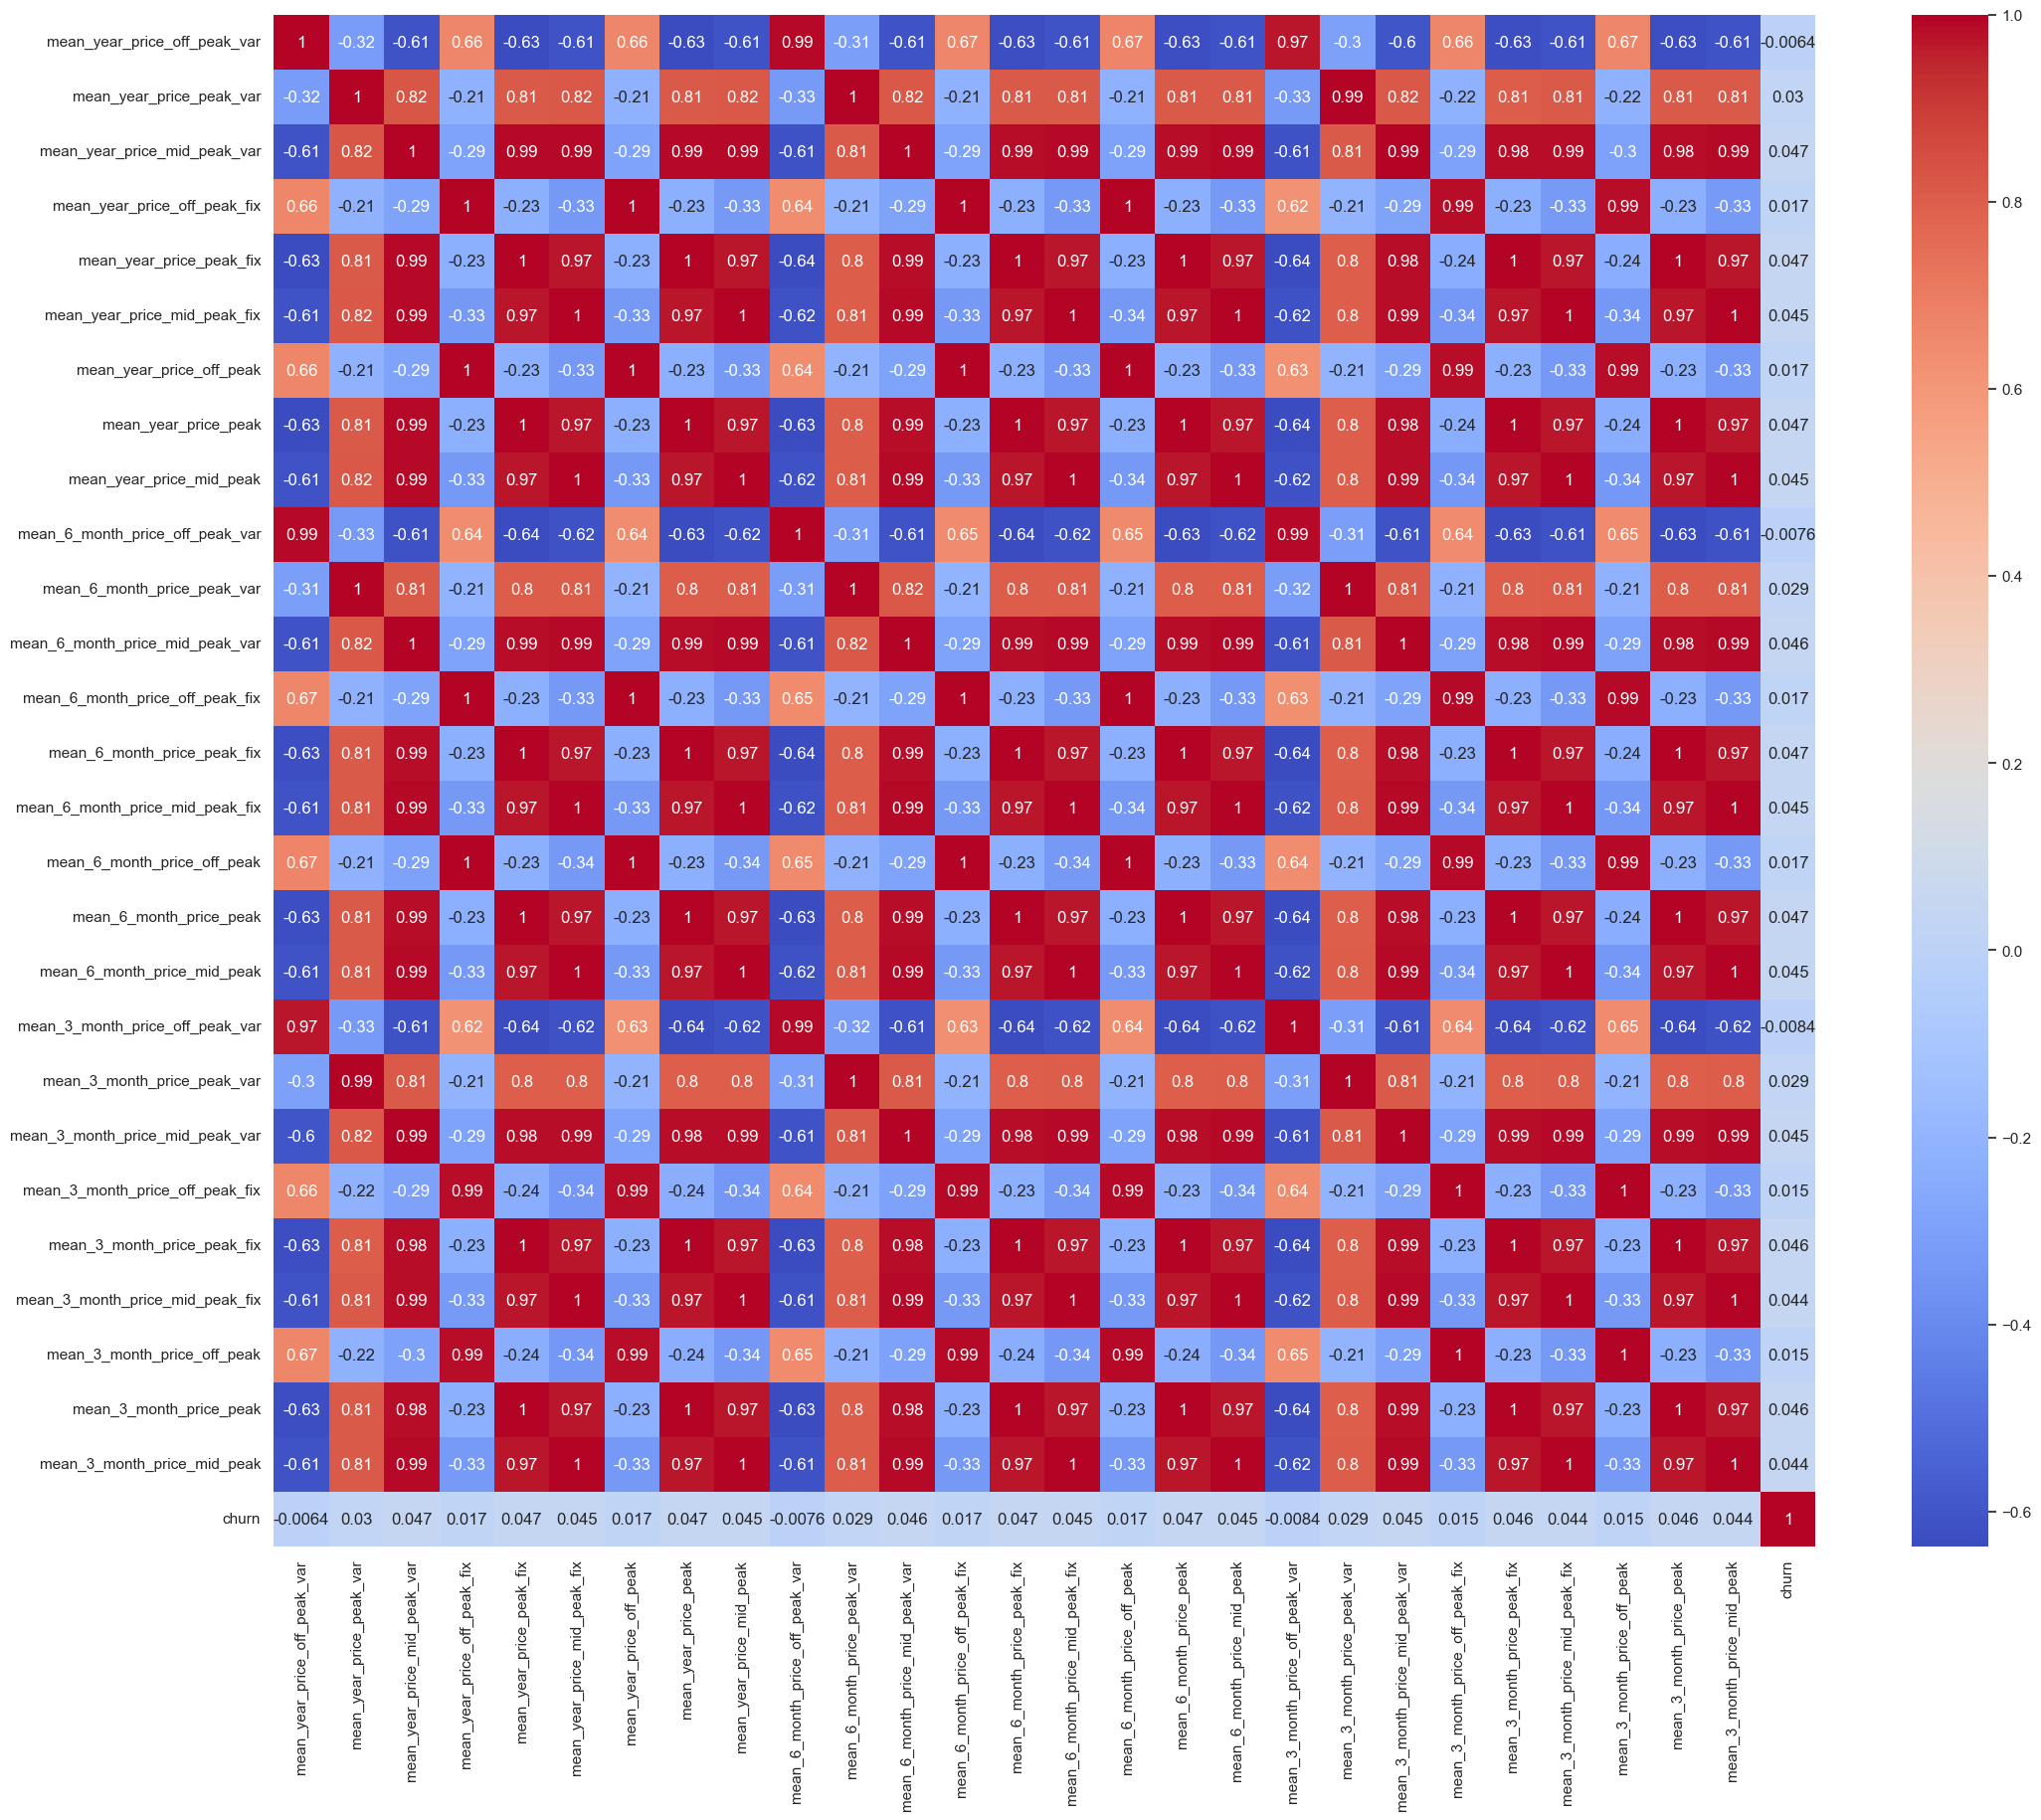

In [42]:
# Checking Correlation
corr = price_analysis.corr()

# Plotting the correlation
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
plt.show()

In [43]:
# Now merging the price_analysis dataframe with the client_df dataframe
final_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on="id")
final_data.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3_month_price_off_peak_var,mean_3_month_price_peak_var,mean_3_month_price_mid_peak_var,mean_3_month_price_off_peak_fix,mean_3_month_price_peak_fix,mean_3_month_price_mid_peak_fix,mean_3_month_price_off_peak,mean_3_month_price_peak,mean_3_month_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [ ]:
# Save dataset
final_data.to_csv('../Data/clean_data_after_eda.csv')

**Author's Note:** I define price sensitivity as the ratio of the monthly price to the average monthly consumption. The higher the ratio, the more sensitive the customer is to price.